# Pandas

In [1]:
import pandas as pd

## DataFrame

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [3]:
# Выведем первые записи (по умолчанию 5):
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Выведем последние записи (по умолчанию 5):
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
# Посмотрим, сколько строчек и колонок:
df.shape

(1000, 8)

In [6]:
# Получим коллекцию с индексами строк:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [7]:
# Получим коллекцию с названиями колонок:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
# Посмотрим типы данных:
df.dtypes

# object - грубо говоря данные, которые хранятся в виде строк.

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# Посчитаем описательные статистики для количественных переменных:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Отбор колонок и строк

### iloc

In [11]:
# Отберем первые 5 строк и первые 3 колонки
# iloc[] принимает на вход числовые индексы - iloc - integer location:
df.iloc[0:5, 0:3]

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college


In [12]:
# Укажем конкретные номера строк и колонок (-1 - последняя с конца):
df.iloc[[0, 3, 10], [0, 5, -1]]

,gender,math score,writing score
0,female,72,74
3,male,47,44
10,male,58,52


In [13]:
# Запишем в индексы имена студентов вместо чисел:
df_with_names = df.iloc[[0, 3, 4, 7, 8]]
df_with_names.index = ['Cersei', 'Tywin', 'Gregor', 'Joffrey', 'Ilyn Payne']
df_with_names

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Cersei,female,group B,bachelor's degree,standard,none,72,72,74
Tywin,male,group A,associate's degree,free/reduced,none,47,57,44
Gregor,male,group C,some college,standard,none,76,78,75
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


### loc

In [14]:
# Отберем строки по индексам (loc[] принимает на вход лейблы):
df_with_names.loc[['Cersei', 'Joffrey']]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Cersei,female,group B,bachelor's degree,standard,none,72,72,74
Joffrey,male,group B,some college,free/reduced,none,40,43,39


In [15]:
# Отберем еще и колонки:
df_with_names.loc[['Cersei', 'Joffrey'], ['gender', 'writing score']]

,gender,writing score
Cersei,female,74
Joffrey,male,39


## Series

In [16]:
# Если отберем одну колонку из датафрейма, получим серию:
# ":" означает все строки (поставим вторым параметром - все колонки)
df.iloc[:, 0]

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

In [17]:
# Серия - одноразмерный массив с некоторыми лейблами.
type(df.iloc[:, 0])

pandas.core.series.Series

In [18]:
# Если отберем более одной колонки из датафрейма, получим датафрейм:
type(df_with_names.loc[['Cersei', 'Joffrey'], ['gender', 'writing score']])

pandas.core.frame.DataFrame

In [19]:
# Создадим серию:
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [20]:
# Можно задать индексы при создании:
pd.Series([1, 2, 3], index=['Cersei', 'Tywin', 'Gregor'])

Cersei    1
Tywin     2
Gregor    3
dtype: int64

In [21]:
# Создадим датафрейм из серий:
my_series_1 = pd.Series([1, 2, 3], index=['Cersei', 'Tywin', 'Gregor'])
my_series_2 = pd.Series([4, 5, 6], index=['Cersei', 'Tywin', 'Gregor'])
pd.DataFrame({'col_name_1': my_series_1, 'col_name_2': my_series_2})

,col_name_1,col_name_2
Cersei,1,4
Tywin,2,5
Gregor,3,6


In [22]:
# Если обратимся к датафрейму через одни квадратные кобки, получим серию:
df_with_names['gender']

Cersei        female
Tywin           male
Gregor          male
Joffrey         male
Ilyn Payne      male
Name: gender, dtype: object

In [23]:
# Если обратимся к датафрейму через две квадратные кобки, получим датафрейм:
df_with_names[['gender']]

,gender
Cersei,female
Tywin,male
Gregor,male
Joffrey,male
Ilyn Payne,male


## Фильтрация данных

In [24]:
df.gender

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

In [25]:
df.gender == 'female'

0       True
1       True
2       True
3      False
4      False
       ...  
995     True
996    False
997     True
998     True
999     True
Name: gender, Length: 1000, dtype: bool

In [26]:
# Выберем только женщин:
df[df.gender == 'female'].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [27]:
df.loc[df.gender == 'female', ['gender', 'writing score']].head()
# Альтернатива:
# df[df.gender == 'female'][['gender', 'writing score']]

,gender,writing score
0,female,74
1,female,88
2,female,93
5,female,78
6,female,92


In [28]:
# Получим среднее значение writing score:
df['writing score'].mean()

68.054

In [29]:
# Отберем колонки, где writing score превышает среднее значение по показателю в датафрейме:
mean_ws = df['writing score'].mean()
df[df['writing score'] > mean_ws].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [30]:
# Отберем колонки, где все writing score выше среднего и пол женский (условия обязательно берем в скобки):
df[(df['writing score'] > mean_ws) & (df['gender'] == 'female')].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [31]:
# Переименуем колонки, чтобы можно было обращаться через точку:
df = df.rename(columns={
    'parental level of education': 'parental_level_of_education',
    'test preparation course': 'test_preparation_course',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score',
})
df.columns
# Альтернатива:
# df.columns = [x.replace(' ', '_') for x in df.columns]

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

### query

In [32]:
# Отберем строки, где writing_score выше 78:
df.query('writing_score > 78').head()
# Альтернатива:
# df[df.writing_score > 78]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80


In [33]:
# Отберем наблюдения только про женщин:
df.query('gender == "female"').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [34]:
# В query не надо брать условия в скобки:
df.query('gender == "female" & writing_score > 78').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83
38,female,group D,associate's degree,free/reduced,completed,75,90,88


In [35]:
# Переменные в query экранируем с помощью знака @
writing_score_query = 78
df.query('writing_score > @writing_score_query').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
16,male,group C,high school,standard,none,88,89,86
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80


In [36]:
# Посмотреть уникальные значения колонки:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [37]:
# Отберем строки, где race/ethnicity со значениями или 'group A', или 'group B':
df[df['race/ethnicity'].isin(['group A', 'group B'])].head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


### filter

In [38]:
# Возьмем колонки, которые имеют в названии "score":
# axis=1 - по названиям колонок:
df_with_names.filter(like='score', axis=1)

# Альтернатива:
# df_with_names[[c for c in df_with_names.columns if 'score' in c]].head()

,math score,reading score,writing score
Cersei,72,72,74
Tywin,47,57,44
Gregor,76,78,75
Joffrey,40,43,39
Ilyn Payne,64,64,67


In [39]:
# axis=0 - по индексам строк:
df_with_names.filter(like='Jof', axis=0)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Joffrey,male,group B,some college,free/reduced,none,40,43,39


## Группировка и агрегация

In [40]:
# Группировка:
df.groupby('gender')

In [41]:
# Посчитаем среднее количество баллов в зависимости от пола студентов:
df.groupby('gender').mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [42]:
# Сгруппируем данные по переменной gender и посчитаем среднее значение переменной writing score:
df.groupby('gender').agg({'writing_score': 'mean'})

,writing_score
gender,
female,72.467181
male,63.311203


In [43]:
# Перенесем строки с помощью "\":
df.groupby('gender', as_index=False) \
    .agg({'writing_score': 'mean'}) \
    .rename(columns={'writing_score': 'mean_writing_score'})

,gender,mean_writing_score
0,female,72.467181
1,male,63.311203


In [44]:
# Можно взять в список, тогда не нужно переименовывать:
df.groupby('gender', as_index=False) \
    .agg({'math_score': ['mean', 'count', 'std'], 'reading_score': ['std', 'min', 'max']})

gender math_score                  reading_score         
                mean count        std           std min  max
0  female  63.633205   518  15.491453     14.378245  17  100
1    male  68.728216   482  14.356277     13.931832  23  100

## Сортировка

In [45]:
# По возрастанию:
df.sort_values('math_score').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23
17,female,group B,some high school,free/reduced,none,18,32,28
787,female,group B,some college,standard,none,19,38,32
145,female,group C,some college,free/reduced,none,22,39,33


In [46]:
# По убыванию:
df.sort_values('math_score', ascending=False).head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
962,female,group E,associate's degree,standard,none,100,100,100
625,male,group D,some college,standard,completed,100,97,99
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
451,female,group E,some college,standard,none,100,92,97


In [47]:
# Отсортируем в порядке возрастания по gender, и в порядке убывания по math_score:
df.sort_values(['gender', 'math_score'], ascending=[True, False]).head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [48]:
# Отберем по 5 топ студентов юношей и девушек по математике:
df.sort_values(['gender', 'math_score'], ascending=False).groupby('gender').head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


## Добавление и удаление колонок

In [49]:
# Добавим колонку total_score:
df['total_score'] = df.math_score + df.reading_score + df.writing_score
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [50]:
# Удалим колонку total_score:
df = df.drop(['total_score'], axis=1)
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Визуализация

In [59]:
import seaborn as sns
sns.set(rc={'figure.figsize': (9, 6)})

<AxesSubplot:>

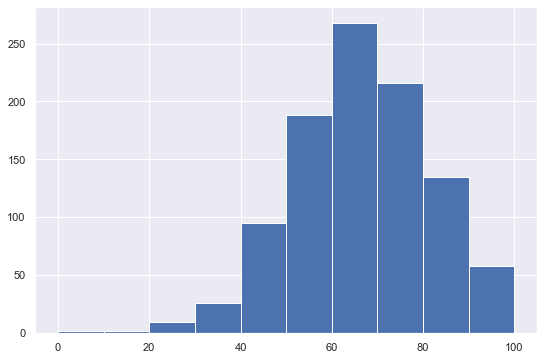

In [60]:
# Посмотрим гистограмму распределения баллов по математике:
df.math_score.hist()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

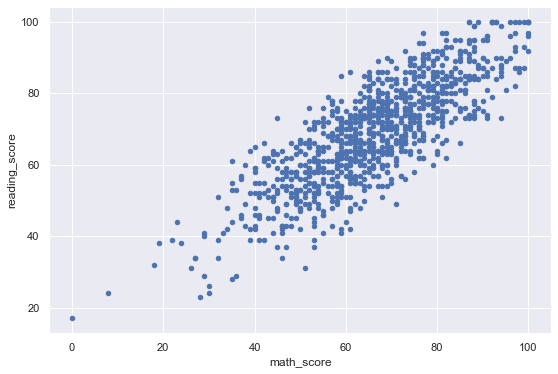

In [61]:
# Построим диаграмму рассеивания:
df.plot.scatter(x='math_score', y='reading_score')

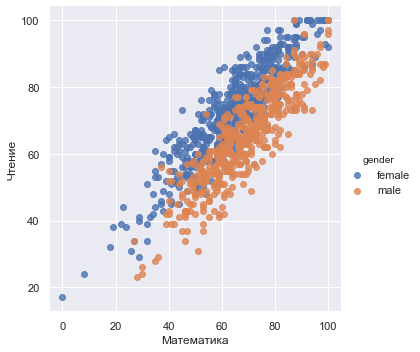

In [54]:
# С помощью Seaborn разделим точки на группы по полу:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender', data=df, fit_reg=False)
ax.set_ylabels('Чтение')
ax.set_xlabels('Математика')

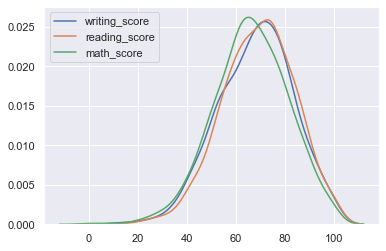

In [55]:
# Построим сразу несколько распределений на одном графике:
for column in df.loc[:, ['writing_score', 'reading_score', 'math_score']]:
    sns.kdeplot(df[column])

<AxesSubplot:ylabel='writing_score'>

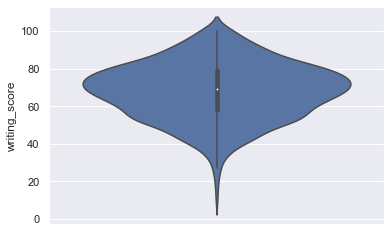

In [56]:
sns.violinplot(y='writing_score', data=df)

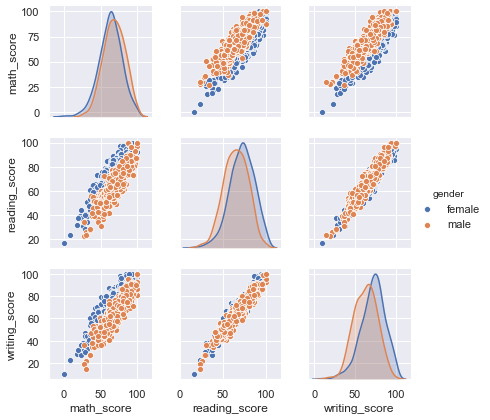

In [57]:
sns.pairplot(df, hue='gender', height=2)